In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [3]:
#craeting database
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select*from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,Stockturnover,SalrstoPurchaseRatio,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,1.396897


#EDA EXPLOTARY DATA ANALYSIS
1. previously we examined the various tables in the database to identify key variables,understandingtheir relatinship and determine which one should be
   included in the final analysis

2. in this phase of EDA we will analyze the resulatnt table to agin insights into yhe distribution of each column.this will help us to understand the patterns,
identify anomalies and ensure adat quality before proceeding with further analysis


In [4]:
#summary ststistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,9993.0,10480.582408,18445.414911,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,9993.0,17900.533674,12761.325117,58.000000,5669.000000,18431.000000,25317.000000,9.063100e+04
PurchasePrice,9993.0,23.567765,107.496715,0.360000,6.800000,10.340000,18.820000,5.681810e+03
ActualPrice,9993.0,34.583550,145.876423,0.490000,10.950000,15.990000,27.990000,7.499990e+03
Volume,9993.0,853.552637,684.602096,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,9993.0,3345.217252,11447.351390,1.000000,36.000000,326.000000,2199.000000,3.376600e+05
TotalPurchaseDollars,9993.0,31946.885164,127082.854899,0.710000,483.780000,4164.300000,23005.710000,3.811252e+06
TotalSalesQuantity,9993.0,3289.293005,11299.033276,0.000000,44.000000,337.000000,2171.000000,3.349390e+05
TotalSalesDollars,9993.0,45124.698962,173051.828363,0.000000,979.750000,6526.310000,31896.110000,5.101920e+06
TotalSalesPrice,9993.0,20061.238868,46232.290422,0.000000,389.740000,3549.290000,18038.700000,6.728193e+05


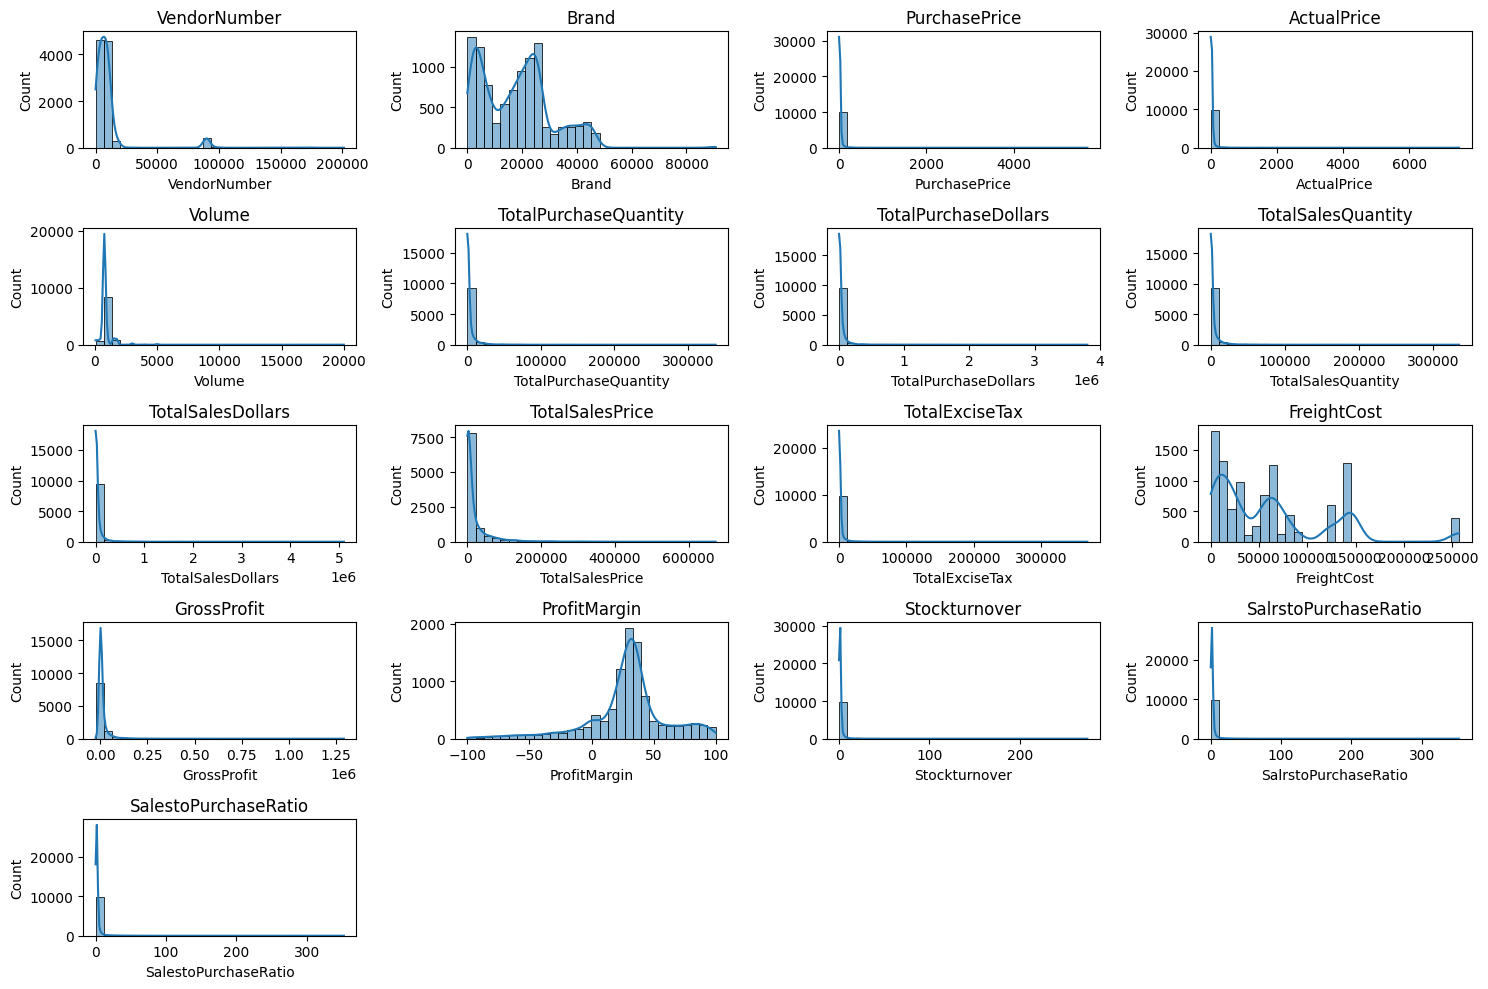

In [5]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)  # 5 rows, 4 columns = 20 slots

    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()
    
    
                    

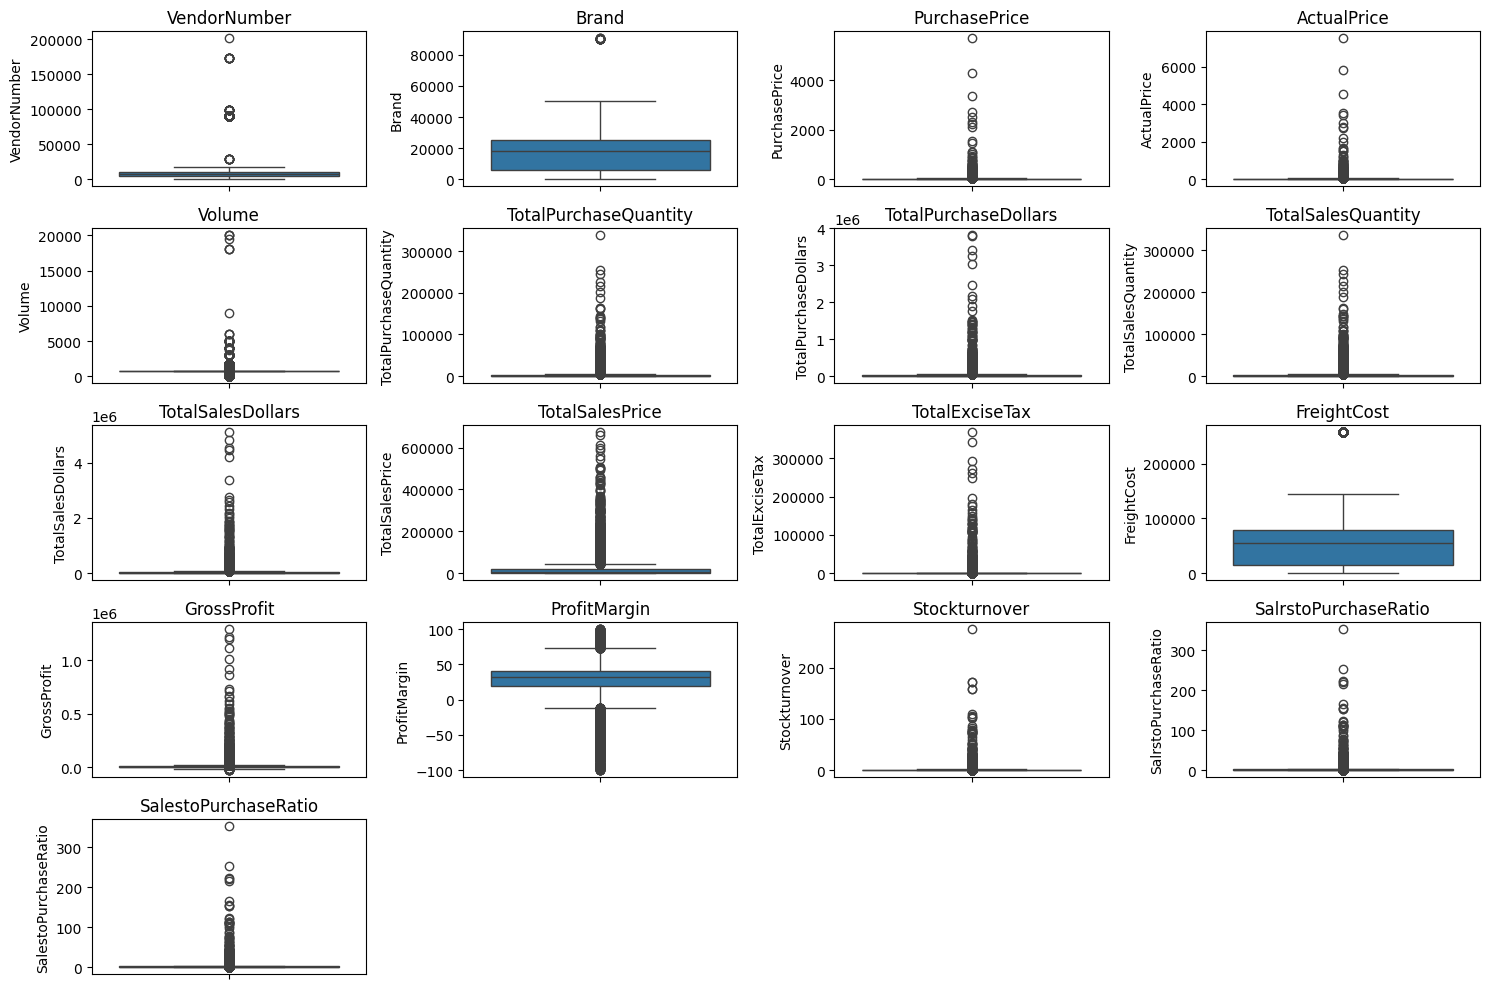

In [6]:
#outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
      plt.subplot(5,4,i+1)
      sns.boxplot(y=df[col])
      plt.title(col)
plt.tight_layout()
plt.show()


Summary Satistics





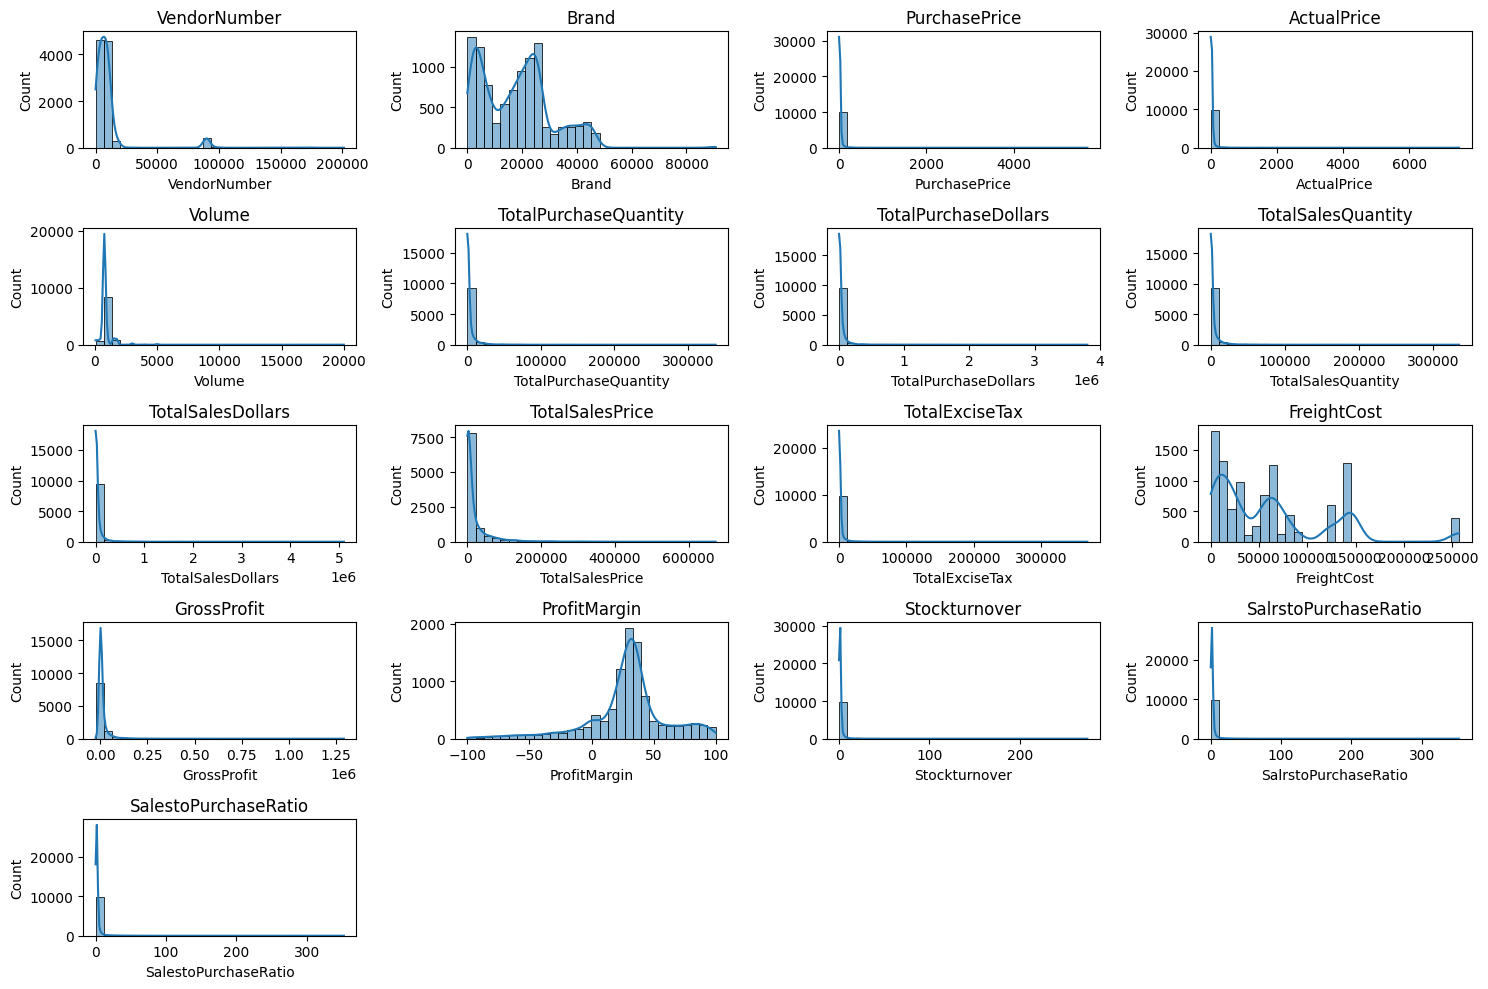

In [7]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

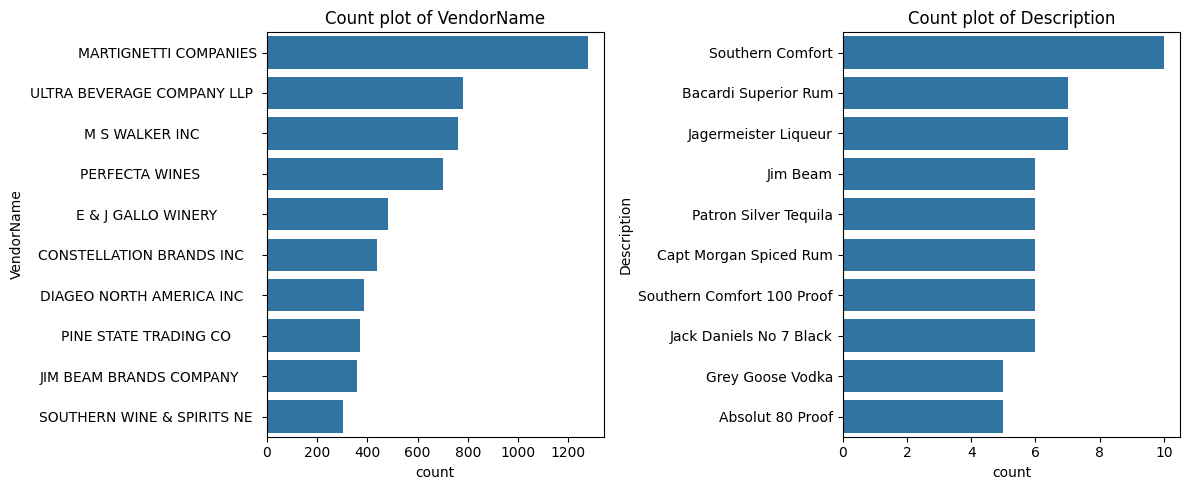

In [8]:
# Distribution Plots for categorical Columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order =df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'Stockturnover', 'SalrstoPurchaseRatio',
       'SalestoPurchaseRatio'],
      dtype='object')

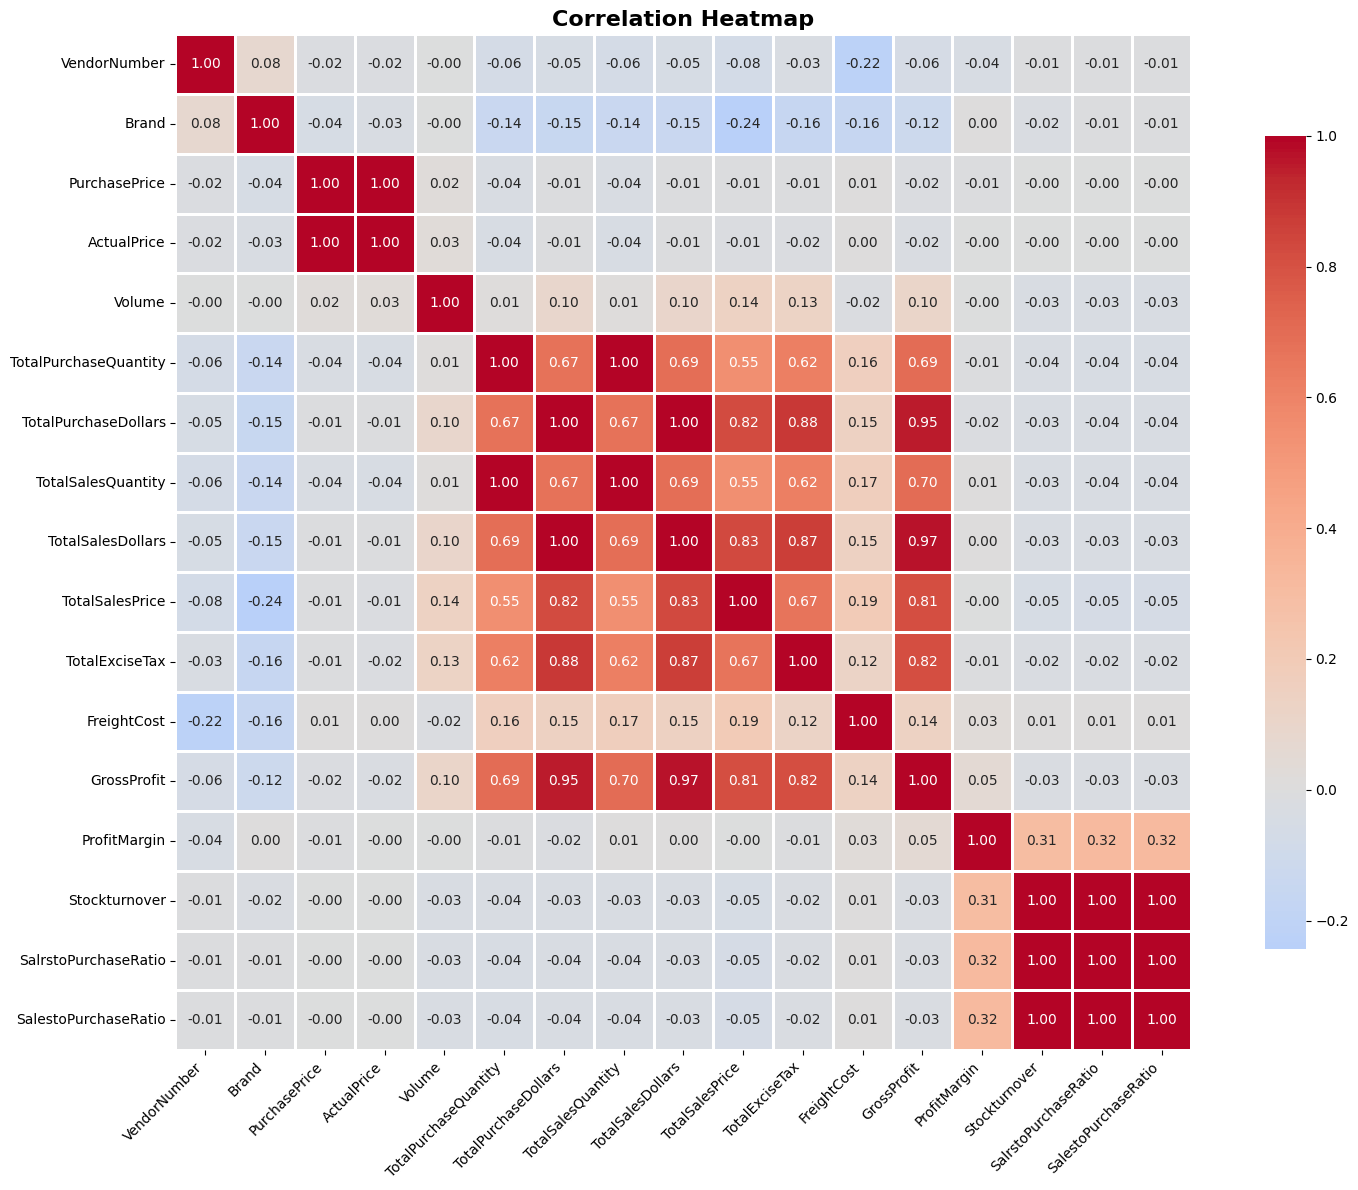

In [10]:


#correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(16, 12))  # Bigger for better readability
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=1,
    linecolor='white',
    square=True,        # Makes each cell square
    cbar_kws={"shrink": 0.8},  # Shrinks the color bar
    annot_kws={"size": 10}     # Font size for annotations
)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

*Correlation Insights.

1.purchasePrize has week correlation with totalSalesDollars(-0.012) and GrossProfit(-0.016) suggesting that price variations do not significantly impact
  sales revenue or profit
2.strong correlation between total purchase quantity and total sales quantity(0.99),confirming efficcient inventory turnover
3.negative correlation between total purchase quantity and total sales quantity(0.999), confirming efficient inventory turnover.
4.stockTurner has weak negative correlations with both grossProfit (-0.038) and profitMargin (-0.055),indicating than faster turnover does ot necessarily
  result in higher profitablity.


*Data analysis.

*Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins

In [11]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
     'ProfitMargin':'mean'}).reset_index()

In [12]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
low_sales_threshold

np.float64(399.78499999999997)

In [14]:
high_margin_threshold

np.float64(58.63686816009383)

In [15]:
#Filter the barnds with low sales but high profit margins
target_brand = brand_performance[
      (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
      (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brand with low sales but high profit margins:")
display(target_brand.sort_values('TotalSalesDollars'))









Brand with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
7244,Santa Rita Organic Svgn Bl,9.99,66.466466
2732,Debauchery Pnt Nr,11.58,65.975820
2391,Concannon Glen Ellen Wh Zin,15.95,83.448276
2524,Crown Royal Apple,27.86,89.806174
7284,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
1239,C Monaci Kreos Rosato,395.78,66.203446
3625,Galliano Tiki Gift Pack,398.79,85.566338
2979,Dr McGillicudy's Buttersctch,398.97,86.139309
537,Bacardi Oakheart Spiced Trav,399.60,98.133133


In [16]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualization

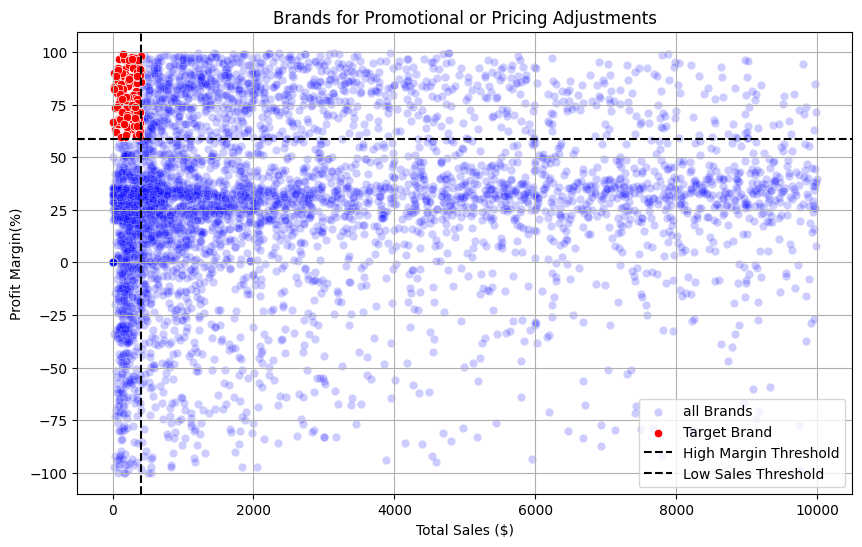

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin',color='blue', label="all Brands",alpha =0.2)
sns.scatterplot(data= target_brand,x='TotalSalesDollars',y='ProfitMargin',color='red',label="Target Brand")

plt.axhline(high_margin_threshold,linestyle='--',color='black',label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--',color='black',label='Low Sales Threshold')


plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin(%)')
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()           
plt.grid(True)
plt.show()

which vendors and brands demonstarate the highest sales performance

In [18]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:2f}k"
    else:
        return str(value)
    
    

In [19]:
#Top vendors and brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC       68721473.62
MARTIGNETTI COMPANIES          40792700.54
PERNOD RICARD USA              32271561.03
JIM BEAM BRANDS COMPANY        31857065.44
BACARDI USA INC                25002027.58
CONSTELLATION BRANDS INC       24462057.09
E & J GALLO WINERY             18545280.75
BROWN-FORMAN CORP              18472196.31
ULTRA BEVERAGE COMPANY LLP     17689700.31
M S WALKER INC                 15367227.33
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [21]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

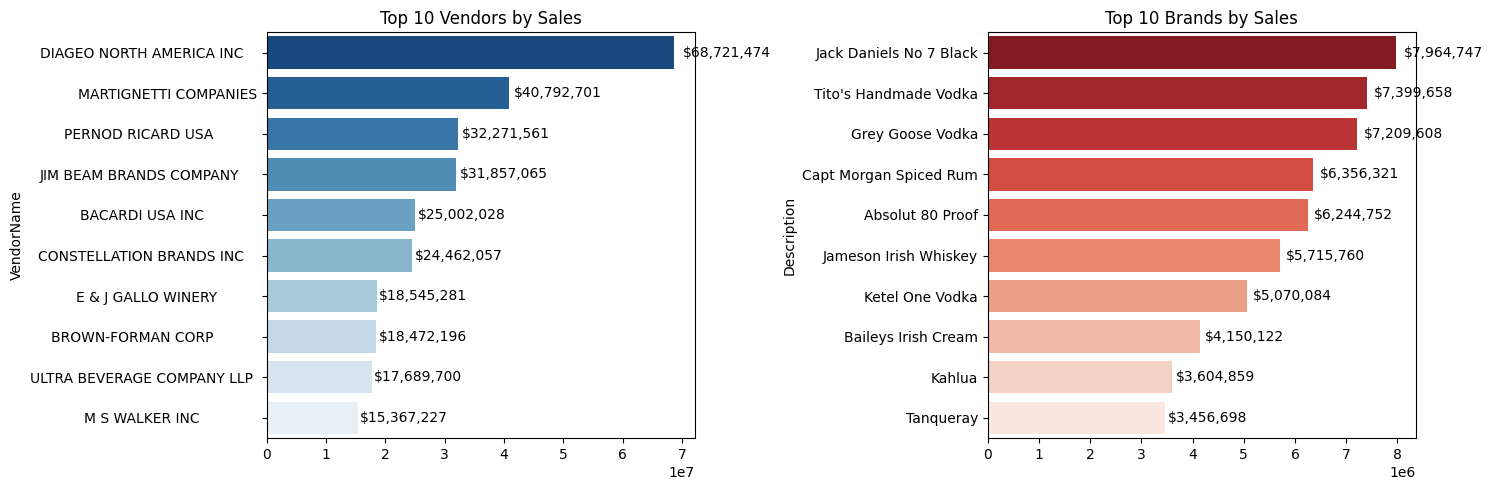

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# --- Plot for Top Vendors ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=top_vendors.values, y=top_vendors.index.astype(str), palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        f"${bar.get_width():,.0f}",
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# --- Plot for Top Brands ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=top_brands.values, y=top_brands.index.astype(str), palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        f"${bar.get_width():,.0f}",
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


which vendor contributed the most to total purchase dollars

In [23]:
# Aggregate vendor performance
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

# Calculate contribution %
vendor_performance['PurchaseContribution'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

# Sort and round
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution', ascending=False), 2)

# Get top 10 vendors
top_vendors = vendor_performance.head(10)

# Format values
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['PurchaseContribution'] = (top_vendors['PurchaseContribution'] * 100).round(2).astype(str) + '%'

# Display
top_vendors


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
27,DIAGEO NORTH AMERICA INC,50.89M,17.83M,68.72M,1594.0%
61,MARTIGNETTI COMPANIES,27.39M,13.41M,40.79M,858.0%
73,PERNOD RICARD USA,24.10M,8.17M,32.27M,755.0%
49,JIM BEAM BRANDS COMPANY,24.05M,7.81M,31.86M,753.0%
8,BACARDI USA INC,17.61M,7.39M,25.00M,552.0%
22,CONSTELLATION BRANDS INC,15.56M,8.90M,24.46M,487.0%
13,BROWN-FORMAN CORP,13.50M,4.97M,18.47M,423.0%
112,ULTRA BEVERAGE COMPANY LLP,12.76M,4.93M,17.69M,400.0%
32,E & J GALLO WINERY,12.26M,6.29M,18.55M,384.0%
57,M S WALKER INC,10.62M,4.75M,15.37M,333.0%


In [24]:
top_vendors['Cumulative_contribution%'] = top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,Cumulative_contribution%
27,DIAGEO NORTH AMERICA INC,50.89M,17.83M,68.72M,1594.0%,1594.0%
61,MARTIGNETTI COMPANIES,27.39M,13.41M,40.79M,858.0%,1594.0%858.0%
73,PERNOD RICARD USA,24.10M,8.17M,32.27M,755.0%,1594.0%858.0%755.0%
49,JIM BEAM BRANDS COMPANY,24.05M,7.81M,31.86M,753.0%,1594.0%858.0%755.0%753.0%
8,BACARDI USA INC,17.61M,7.39M,25.00M,552.0%,1594.0%858.0%755.0%753.0%552.0%
22,CONSTELLATION BRANDS INC,15.56M,8.90M,24.46M,487.0%,1594.0%858.0%755.0%753.0%552.0%487.0%
13,BROWN-FORMAN CORP,13.50M,4.97M,18.47M,423.0%,1594.0%858.0%755.0%753.0%552.0%487.0%423.0%
112,ULTRA BEVERAGE COMPANY LLP,12.76M,4.93M,17.69M,400.0%,1594.0%858.0%755.0%753.0%552.0%487.0%423.0%400.0%
32,E & J GALLO WINERY,12.26M,6.29M,18.55M,384.0%,1594.0%858.0%755.0%753.0%552.0%487.0%423.0%400...
57,M S WALKER INC,10.62M,4.75M,15.37M,333.0%,1594.0%858.0%755.0%753.0%552.0%487.0%423.0%400...


TypeError: unsupported operand type(s) for -: 'str' and 'int'

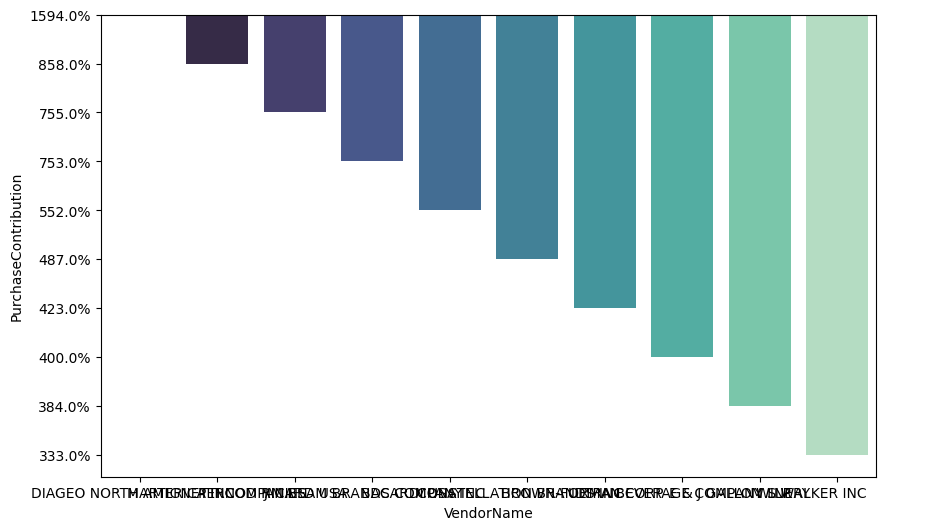

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution'], palette="mako", ax=ax1)

# Add text labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], 
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

# Axis labels and ticks
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('PurchaseContribution ', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Reference line and legend
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


how much of total procurement is dependent on the top vendors


In [ ]:
print(f"Total purchase contribution of top 10 vendors is{round (top_vendors['Purchase_contribution%'].sum(),2)}%")


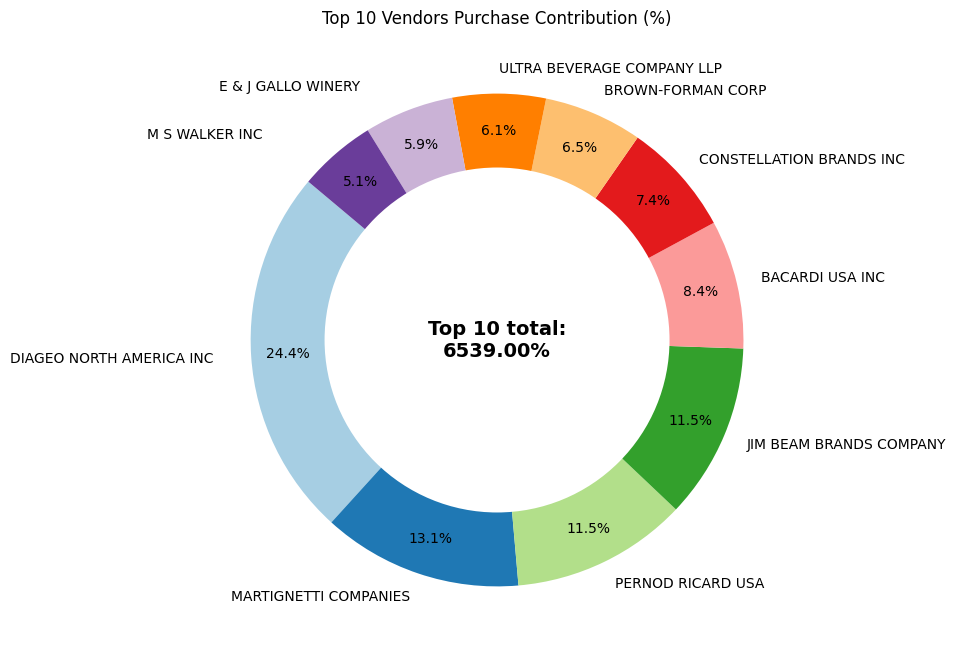

In [36]:
vendors  = list(top_vendors['VendorName'].values)

# Remove '%' and convert to float
purchaseContribution = top_vendors['PurchaseContribution'].str.replace('%', '').astype(float).values
purchaseContribution = list(purchaseContribution)

# Calculate total and remaining contribution
total_contribution = sum(purchaseContribution)
remaining_contribution = 100 - total_contribution

# Append "other vendors" category if valid
if remaining_contribution > 0:
    vendors.append("Other Vendors")
    purchaseContribution.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(
    purchaseContribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a donut
center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(center_circle)

# Add total contribution annotation in the center
plt.text(0, 0, f"Top 10 total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()


does purchase in bulk reduce yhr unt price,and what is the optimal purcahse volume for cost savings


In [53]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']


In [54]:
df["orderSize"] =  pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","large"])

In [55]:
df[['orderSize','TotalPurchaseQuantity']]

,orderSize,TotalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
9988,Small,2
9989,Small,6
9990,Small,2
9991,Small,1


In [56]:
df.groupby('orderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
orderSize,
Small,42.127199
Medium,16.960961
large,11.131606


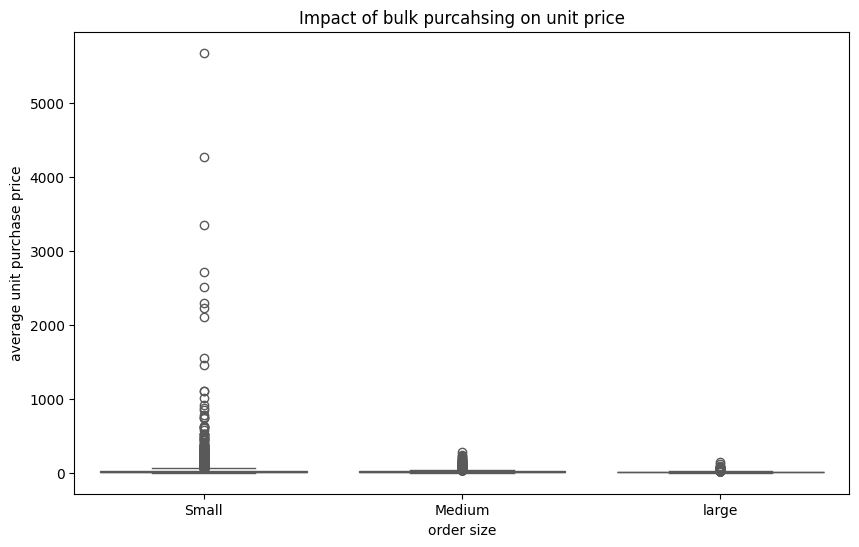

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="orderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of bulk purcahsing on unit price")
plt.xlabel("order size")
plt.ylabel("average unit purchase price")
plt.show()           

1.vendors byuong in bulk (large order size) get the lowest unit price($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
2. The price differnces between small and alarge orders is substanatil(-72% reduction in unit ocst)
3. This suggest that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall
   sales despite lower per unit revenue


Which vendors have low inventory turnover , indicating excess stock and slow-moving products

In [68]:
df[df['Stockturnover']<1].groupby('VendorName')[['Stockturnover']].mean().sort_values('Stockturnover',ascending =True).head(10)

,Stockturnover
VendorName,
AAPER ALCOHOL & CHEMICAL CO,0.000000
LAUREATE IMPORTS CO,0.000000
HIGHLAND WINE MERCHANTS LLC,0.175595
MILTONS DISTRIBUTING CO,0.236111
UNCORKED,0.359375
ADAMBA IMPORTS INTL INC,0.419351
VINEYARD BRANDS LLC,0.441341
Russian Standard Vodka,0.450740
R.P.IMPORTS INC,0.457143


how much capital is locked in unsold inventory per vendor,and which vendors contribute the most to it

In [72]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity']*df['PurchasePrice'])
print('TotalUnsoldCapital:',format_dollars(df['UnsoldInventoryValue'].sum())  )                          

TotalUnsoldCapital: -279174869.34


In [75]:
#aggregate capiatl locked per vendor

inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
55,LAUREATE IMPORTS CO,29.0
0,AAPER ALCOHOL & CHEMICAL CO,1.0
18,CAPSTONE INTERNATIONAL,-173.58
35,FANTASY FINE WINES CORP,-195.76000000000002
90,SILVER MOUNTAIN CIDERS,-205.46
113,UNCORKED,-247.92000000000002
47,"IRA GOLDMAN AND WILLIAMS, LLP",-421.48
44,HIGHLAND WINE MERCHANTS LLC,-649.12
4,AMERICAN SPIRITS EXCHANGE,-828.3900000000001
6,APPOLO VINEYARDS LLC,-897.4000000000001


what is the 95% confidence intervals for profit margin of top performing and low performing vendors

In [77]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [78]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"]  <= low_threshold]["ProfitMargin"].dropna()

In [81]:
low_vendors

2438     0.000000
2509     0.000000
2951     0.000000
2975     0.000000
2993     0.000000
          ...    
9988    83.448276
9989    96.436186
9990    25.252525
9991    98.974037
9992    99.166079
Name: ProfitMargin, Length: 2499, dtype: float64

In [84]:
def confidence_interval(data,confidence=0.95):
           mean_val = np.mean(data)
           std_err = np.std(data,ddof=1 / np.sqrt(len(data))) #satndard error
           t_critical = stats.t.ppf((1+confidence)/2,df=len(data)-1)    
           margin_of_error = t_critical *std_err
           return mean_val,mean_val - margin_of_error,mean_val + margin_of_error

Top Vendors 95% CI:(4.443424,55.667368),Mean:30.055396
Low Vendors 95% CI:(-56.384378,98.498515),Mean:21.057068


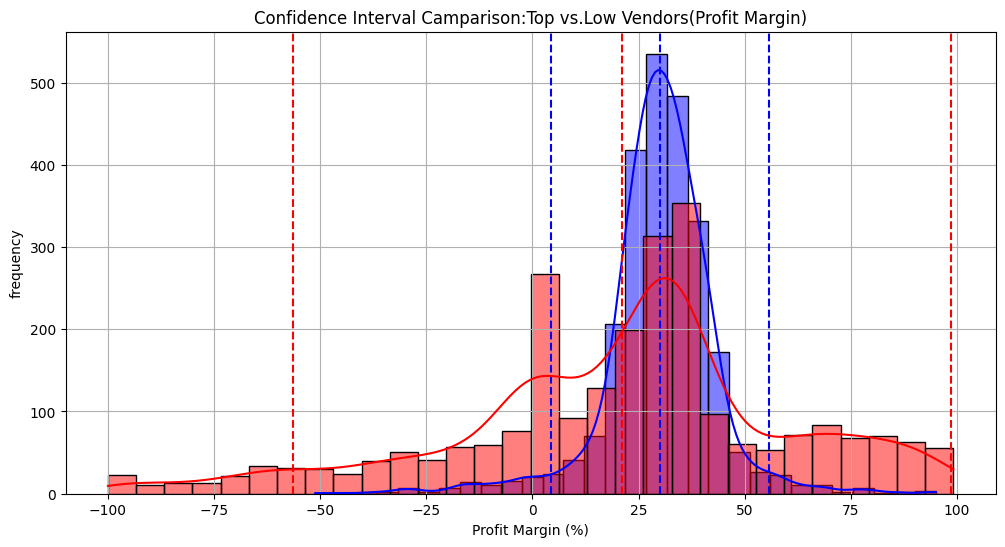

In [88]:
top_mean,top_lower,top_upper = confidence_interval(top_vendors)
low_mean,low_lower,low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI:({top_lower:2f},{top_upper:2f}),Mean:{top_mean:2f}")
print(f"Low Vendors 95% CI:({low_lower:2f},{low_upper:2f}),Mean:{low_mean:2f}")

plt.figure(figsize=(12,6))


#top vendors plot
sns.histplot(top_vendors, kde=True,color="Blue",bins=30,alpha=0.5,label="Top Vendors")
plt.axvline(top_lower,color="blue", linestyle="--",label=f"Top Lower:{top_lower:2f}")
plt.axvline(top_upper, color="blue", linestyle = "--",label=f"Top Upper:{top_upper:2f}")
plt.axvline(top_mean, color="blue", linestyle = "--",label=f"Top Mean:{top_mean:2f}")

#Low Vendors plot

sns.histplot(low_vendors,kde=True,color="red",bins=30,alpha=0.5,label="low vendors")
plt.axvline(low_lower,color="red",linestyle="--",label=f"{low_lower:2f}")
plt.axvline(low_upper,color="red",linestyle="--",label=f"{low_upper:2f}")
plt.axvline(low_mean,color="red",linestyle="--",label=f"{low_mean:2f}")

# finalize  plot
plt.title("Confidence Interval Camparison:Top vs.Low Vendors(Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

1. the confidence interval for low-performing vendors (40.48%) to 42.62%) is significantly higher than that of top performing vendors(30.74% to 31.61%)
2. this suggests that vendors with lower sales tend to maintain higher profit margin potentially due to premium pricing or lower operational costs.
3. for high performing vendor :if they aim  to improve profitabilty ,they could explore selective price adjustments,cost optimization,or bundling       strategies
4. for low performing vendors: despite higher margins, their low sales volume might indicate a need for better marketing , competive pricing , or improved distribution strategies.


Is there is significant difference in mean profit margins between top performing and low performing vendors
hypothesis:

Ho(null Hypothesis): there is no significant difference in the mean profit margins of top performing and low performing vendors.
H1(Alternative Hypothesis): the mean profit margins of top-performing and low -performing vendors are significantly different.    


In [89]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"]  <= low_threshold]["ProfitMargin"].dropna()

# perform the sample t-test
t_stat, p_value = ttest_ind(top_vendors,low_vendors,equal_var=False)

#Print the results
print(f"T-Statistic:{t_stat:4f},p-value:{p_value:4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins betweeen top and low-performance vendors")
else:
    print("Fail to Reject Ho: No significant difference in profit margins")

T-Statistic:10.811965,p-value:0.000000
Reject Ho: There is a significant difference in profit margins betweeen top and low-performance vendors


In [1]:
# Save DataFrame to CSV
vendor_sales_df.to_csv("vendor_sales_performance.csv", index=False)


NameError: name 'vendor_sales_df' is not defined